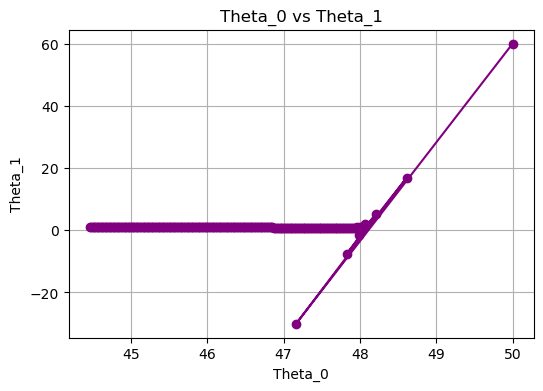

[[ 50.          60.        ]
 [ 47.16483522 -30.04521696]
 [ 48.61357767  16.90457258]
 [ 47.82873978  -7.57375644]
 [ 48.20848825   5.18997286]
 [ 47.98104571  -1.46401438]
 [ 48.07020293   2.00624247]
 [ 47.99430266   0.19779766]
 [ 48.00447719   1.14162588]
 [ 47.96978811   0.65044013]
 [ 47.95850568   0.9074589 ]
 [ 47.93503432   0.77436925]
 [ 47.91793326   0.84467858]
 [ 47.89752586   0.80893681]
 [ 47.87885745   0.82848879]
 [ 47.85929741   0.81921057]
 [ 47.84021733   0.82496371]
 [ 47.82090206   0.82287915]
 [ 47.80172446   0.82488063]
 [ 47.78249012   0.82475122]
 [ 47.7633004    0.82573237]
 [ 47.74410245   0.826134  ]
 [ 47.7249238    0.82683732]
 [ 47.7057501    0.82738288]
 [ 47.68658882   0.82801023]
 [ 47.66743606   0.82859446]
 [ 47.64829385   0.8292007 ]
 [ 47.62916112   0.829795  ]
 [ 47.61003842   0.83039505]
 [ 47.59092545   0.83099164]
 [ 47.57182236   0.83158957]
 [ 47.55272907   0.83218633]
 [ 47.53364562   0.83278323]
 [ 47.51457197   0.83337959]
 [ 47.49550813

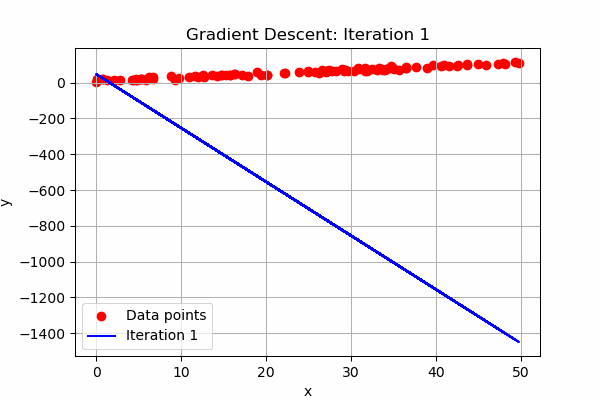

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage, display

X = np.random.uniform(0, 50, size=(100, 1))

noise = np.random.normal(0, 5, size=(100, 1))  # Noise with mean 0 and standard deviation 5
y = 10 + 2 * X + noise

X = np.c_[np.ones(X.shape[0]), X] 

theta = np.array([[50.0], [60.0]])  
learning_rate = 0.001
num_iterations = 200

theta_values = []

theta_values.append(theta.flatten())

def compute_gradient(X, y, theta):
    parentheses = X.dot(theta) - y
    gradient = 2 * parentheses.T.dot(X)
    return gradient.T * (1/X.shape[0])


def gradient_descent(X, y, theta, learning_rate, iterations):
    for i in range(iterations):
        # Compute the gradient
        gradient = compute_gradient(X, y, theta)
        
        # Update theta
        theta -= learning_rate * gradient
        
        # Store theta values after each iteration
        theta_values.append(theta.flatten())  # Flatten to store as a 1D array
        
        # Plot data
    
        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 1], y, color='red', label='Data points')  # Data points
        y_pred = X.dot(theta)  # Predicted line
        plt.plot(X[:, 1], y_pred, color='blue', label=f'Iteration {i + 1}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Gradient Descent: Iteration {i + 1}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'frame_{i:02d}.png')
        plt.close()

    return theta


theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Plot theta_0 vs theta_1
theta_values = np.array(theta_values)  # Convert list to numpy array
plt.figure(figsize=(6, 4))
plt.plot(theta_values[:, 0], theta_values[:, 1], marker='o', linestyle='-', color='purple')
plt.xlabel('Theta_0')
plt.ylabel('Theta_1')
plt.title('Theta_0 vs Theta_1')
plt.grid(True)
plt.show()
print(theta_values)
# Create GIF
frames = [Image.open(f'frame_{i:02d}.png') for i in range(0, num_iterations)]
gif_filename = 'gradient_descent.gif'
frames[0].save(
    gif_filename,
    save_all=True,
    append_images=frames[1:],
    duration=300,
    loop=0
)

display(IPImage(filename=gif_filename))


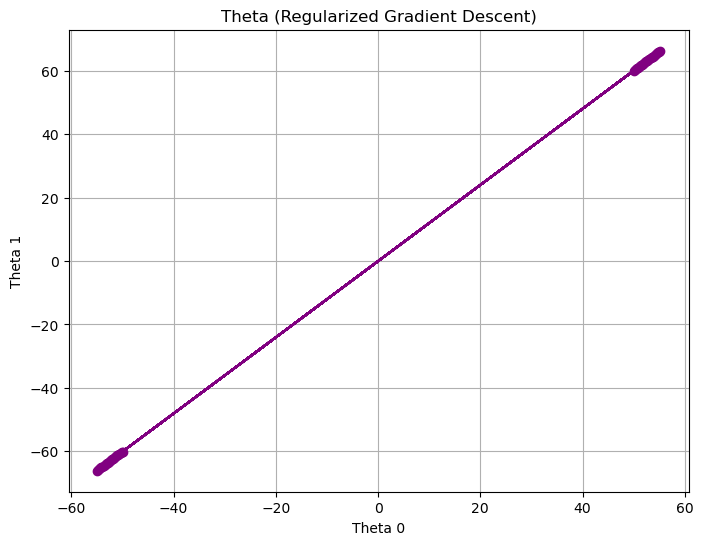

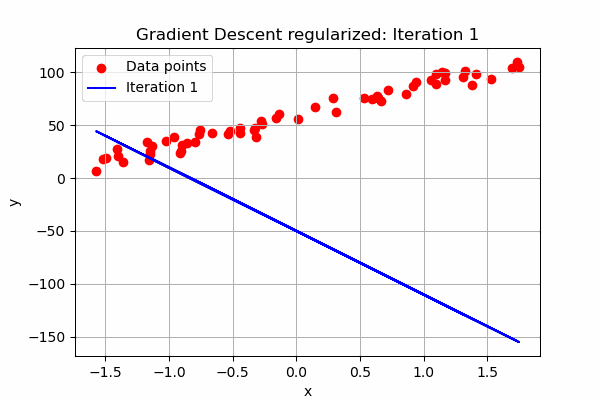

In [93]:
# Regularized Gradient Computation
lambda_ = 1000
def compute_regularized_gradient(X, y, theta, lambda_):
    m = X.shape[0]  
    gradient = (2 / m) * X.T.dot(X.dot(theta) - y) 
    regularization_term = 2 * lambda_ * theta 
    
    gradient += regularization_term
    return gradient

learning_rate=0.001

def regularized_gradient_descent(X, y, theta, learning_rate, iterations, lambda_):
    theta_values = [theta.copy()]  
    for i in range(iterations):
        gradient = compute_regularized_gradient(X, y, theta, lambda_)
        theta -= learning_rate * gradient  # Update theta
        theta_values.append(theta.copy()) 
        
        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 1], y, color='red', label='Data points')  
        y_pred = X.dot(theta)  
        plt.plot(X[:, 1], y_pred, color='blue', label=f'Iteration {i + 1}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Gradient Descent regularized: Iteration {i + 1}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'frame_reg{i:02d}.png')
        plt.close()
    return theta, theta_values


theta_regularized, theta_values_regularized = regularized_gradient_descent(
    X, y, theta_initial.copy(), learning_rate, num_iterations, lambda_
)



frames = [Image.open(f'frame_reg{i:02d}.png') for i in range(0, num_iterations)] 
gif_filename = 'gradient_descent_reg.gif'
frames[0].save(
    gif_filename,
    save_all=True,
    append_images=frames[1:],
    duration=500,
    loop=0
)


theta_values_regularized = np.array(theta_values_regularized)
plt.figure(figsize=(8, 6))
plt.plot(theta_values_regularized[:, 0], theta_values_regularized[:, 1], marker="o", color="purple")
plt.xlabel("Theta 0")
plt.ylabel("Theta 1")
plt.title("Theta (Regularized Gradient Descent)")
plt.grid(True)
plt.show()

display(IPImage(filename=gif_filename))


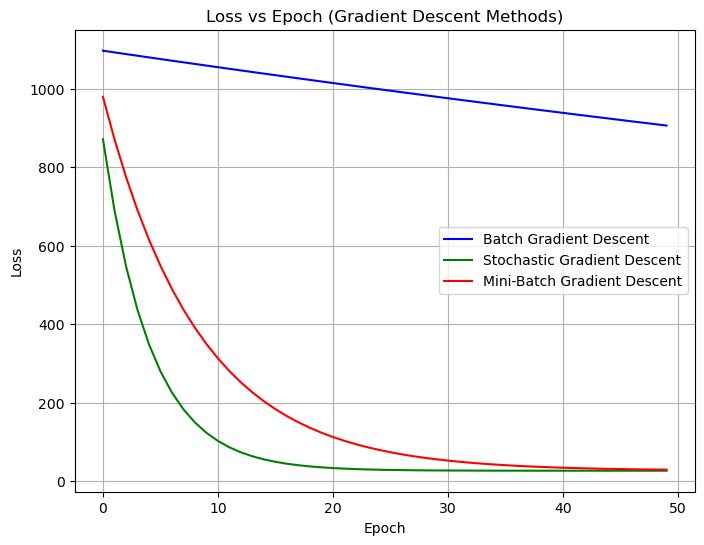

In [91]:
import numpy as np
import matplotlib.pyplot as plt


theta_initial = np.array([[50.0], [60.0]])  
learning_rate = 0.001
num_iterations = 50
batch_size = 2  # Mini-batch size

X = np.random.uniform(0, 50, size=(60, 1))

noise = np.random.normal(0, 5, size=(60, 1))  # Noise with mean 0 and standard deviation 5
y = 10 + 2 * X + noise

X = np.c_[np.ones(X.shape[0]), X]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])



def compute_gradient(X, y, theta):
    parentheses = X.dot(theta) - y
    gradient = 2 * parentheses.T.dot(X)
    return gradient.T * (1/X.shape[0])

# Compute the loss (MSE)
def compute_loss(X, y, theta):
    predictions = X.dot(theta)
    loss = np.mean((predictions - y) ** 2)
    return loss


def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    loss_history = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
    return theta, loss_history

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    loss_history = []
    for i in range(iterations):
        for j in range(X.shape[0]):
            gradient = compute_gradient(X[j:j+1], y[j:j+1], theta)  # Use single data point
            theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
    return theta, loss_history

def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    loss_history = []
    for i in range(iterations):
        for j in range(0, X.shape[0], batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size] # Batch Size
            gradient = compute_gradient(X_batch, y_batch, theta)
            theta -= learning_rate * gradient
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)
    return theta, loss_history

theta_batch, loss_batch = batch_gradient_descent(X, y, theta_initial.copy(), learning_rate, num_iterations)
theta_sgd, loss_sgd = stochastic_gradient_descent(X, y, theta_initial.copy(), learning_rate, num_iterations)
theta_mini_batch, loss_mini_batch = mini_batch_gradient_descent(X, y, theta_initial.copy(), learning_rate, num_iterations, batch_size)

# Step 3: Plot loss vs epoch for each method
plt.figure(figsize=(8, 6))
plt.plot(loss_batch, label="Batch Gradient Descent", color='blue')
plt.plot(loss_sgd, label="Stochastic Gradient Descent", color='green')
plt.plot(loss_mini_batch, label="Mini-Batch Gradient Descent", color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Gradient Descent Methods)')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
# From Chatgpt 
from sklearn.linear_model import SGDRegressor

# Example with your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # Scale the features (excluding the bias)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
sgd_reg.fit(X_scaled, y.ravel())  # Flatten y to 1D
print("Intercept:", sgd_reg.intercept_)
print("Coefficients:", sgd_reg.coef_)


Intercept: [59.1181987]
Coefficients: [28.51188393]
